## PIMS Hackathon, Seattle 2025
### Project B - Preconditioners for Thermal Radiative Transfer
Packages: jupyter, numpy, matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from library import *

L2  : 9.689849562507341e-11
Linf: 4.760858929309109e-10


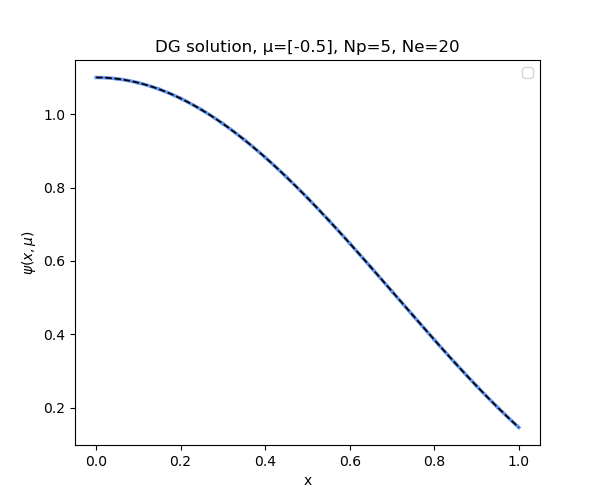

In [4]:
# ─── Example usage (Simple DG) ───

# Parameters for the transport problem
μ      = -0.5
ψ_MMS  = lambda x: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)) # Manufactured solution
σ_t    = lambda x: x**2 + 1
source = lambda x: (μ**3)*(2*x - 6.8*np.sin(2*x)) + (σ_t(x) * (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)))
inflow = lambda x: ψ_MMS(x)

# Mesh parameters
Np = 5                        # Legendre polynomials per element (basis size)
Ne = 20
xs = np.linspace(0, 1, Ne + 1) # Mesh points / element boundaries

# Solve
ψ_weights = transport_direct_solve(μ, σ_t, source, inflow, Np, xs)

# Print the error in the solution
print("L2  :",error_Lp(ψ_weights, xs, Np, ψ_MMS, μ_single=μ, p=2))
print("Linf:",error_Lp(ψ_weights, xs, Np, ψ_MMS, μ_single=μ, p='inf'))

# Plot numerical solution against the exact solution (MMS)
plot_solution(ψ_weights, xs, Np, μ_single=μ, exact_sol=ψ_MMS);

 77%|███████▋  | 23/30 [00:02<00:00,  8.88it/s]


Converged after 24 iterations with tolerance 1e-09.
L2  : 4.993940580087598e-10
Linf: 7.410312363731464e-10


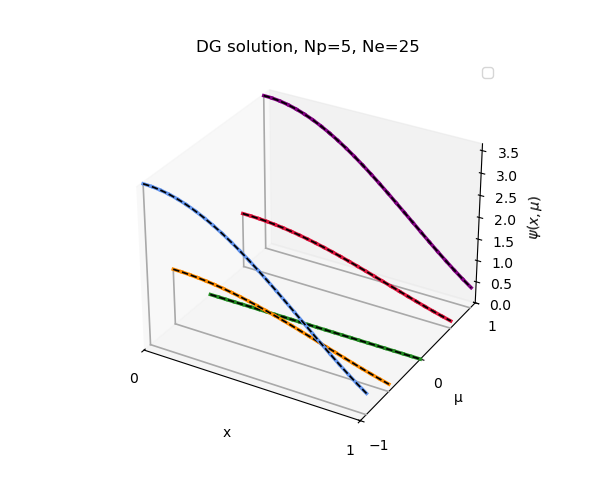

In [9]:
# ─── Example usage (Fixed point iteration) ───

# Parameters for the transport problem
ψ_MMS  = lambda x,μ: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)) # Manufactured solution
σ_t    = lambda x: x**2 + 1
σ_a    = lambda x: x**2 + 1
ε      = 0.7
source = lambda x,μ: (μ**3)/ε * (2*x - 6.8*np.sin(2*x)) + (σ_t(x)/ε**2 * ψ_MMS(x,μ)) \
                   - (σ_t(x)/ε - ε*σ_a(x)) / (3*ε) * ((x**2 +1) + 3.4*np.cos(2*x))
inflow = lambda x,μ: ψ_MMS(x,μ)
 
# Mesh parameters
Np = 5                      # Legendre polynomials per element (basis size)
Nμ = 5                      # Legendre polynomials per element (basis size)
Nt = 30                      # Legendre polynomials per element (basis size)
xs = np.linspace(0, 1, 26) # Mesh points / element boundaries
Ne = len(xs) - 1

# Solve
ψ_weights_all, μs = transport_direct_solve_diffusive(σ_t, σ_a, ε, source, inflow, Np, Nμ, Nt, xs, exact_sol=ψ_MMS, tol=1e-9)

# Print the error in the solution
# ξ_μ, w_μ = gausslegendre(Nμ)
# φ = (w_μ.reshape((-1, 1)) * ψ_weights_all.reshape((Nμ, Ne*Np))).sum(axis=0)
print("L2  :",error_Lp(ψ_weights_all, xs, Np, ψ_MMS, p=2))
print("Linf:",error_Lp(ψ_weights_all, xs, Np, ψ_MMS, p='inf'))

# Plot numerical solution against the exact solution (MMS)
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}
plot_solution(ψ_weights_all, xs, Np, plot_3D=True, exact_sol=ψ_MMS)